# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from scipy.stats import norm
from scipy.stats import kstest
import math
from scipy.stats import normaltest
from scipy.stats import ttest_1samp
from statsmodels.stats.weightstats import ztest

In [68]:
%matplotlib inline

In [3]:
df = pd.read_csv('./data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### 1.Is the distribution of body temperatures normal?
#### Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

In [4]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

#### Method to investigate if the body temperatures distibution is normal: Hypothesis Test

In [9]:
temp_sort = df.temperature.sort_values()

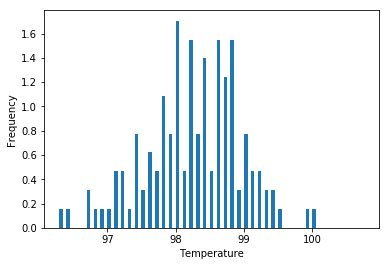

In [10]:
bin_values = np.arange(start=temp_sort.min(), stop=temp_sort .max(), step=.05)
plt.hist(temp_sort, bins = bin_values, normed = True)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.show()


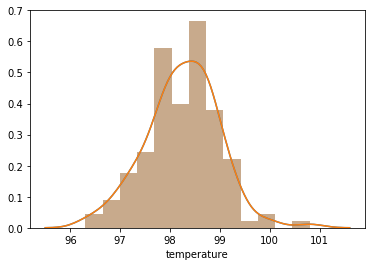

In [37]:
plt.show(sns.distplot(df['temperature']))

$H_0$:The data comes from a normal distribution   

In [43]:
from scipy.stats import normaltest
statistic, p_val = normaltest(df.temperature)

print('p value =',p_val)

p value = 0.258747986349


p_value = 0.2 > alpha = 0.05

In [42]:
if p_val < 0.05:
    print("H0 - that the data comes from a normal distribution - can be rejected")
else:
    print("H0- that the data comes from a normal distribution - cannot be rejected. The distribution of body temperatures is normal!!!")

H0- that the data comes from a normal distribution - cannot be rejected. The distribution of body temperatures is normal!!!


#### Method to investigate if the body temperatures distibution is normal:  Kolmogorove-Smirnov Test  

Cannot understand what is wrong ???????

In [55]:
#Kolmogorove-Smirnov Test

kstest(temp_sort, ss.randint.cdf, args=(0,10))
#args is a tuple containing the extra parameter required by ss.randint.cdf, in this case, lower bound and upper bound


KstestResult(statistic=1.0, pvalue=0.0)

In [12]:
test_stat = kstest(rvs = temp_sort, cdf = 'norm')
test_stat

KstestResult(statistic=1.0, pvalue=0.0)

In [96]:
rn = list(ss.norm.rvs(loc=0.02, size=1000))

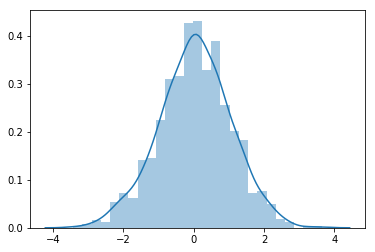

In [97]:
sns.distplot(rn)

In [98]:
kstest(rvs = rn, cdf = 'norm')

KstestResult(statistic=0.037376244409225767, pvalue=0.11931451726130349)

Here the resulting P value is 0.12, we therefore conclude that the array A is not significantly different from a uniform distribution. The way to think about the P value is, it measures the probability of getting the test statistic as extreme as the one observed (here: the first number in the tuple) assuming the null hypothesis is true. In KS test, we actually has the null hypothesis that A is not different from a uniform distribution. A p value of 0.1033 is often not considered as extreme enough to reject the null hypothesis. Usually the P value has to be less than 0.05 or 0.01 in order to reject the null. If this p value in this example is less than 0.05, we will then say A is significantly different from a uniform distribution.

#### Method to investigate if the body temperatures distibution is normal: Quantile Plots

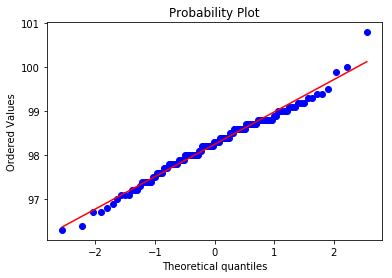

In [14]:
#Quantile Plots CDF

qp = ss.probplot(df.temperature, plot=plt)
plt.show()

When you see a Normal Q-Q plot where the points in the sample are lined up along the line generated by the qqline() command, you’re seeing a sample that could very well be from a normal distribution. In general, when you see the points arranged on a curve, and points far away from the line on the Q-Q plot, it indicates a tendency towards non-normality. 

### 2.Is the sample size large? Are the observations independent?
#### Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

In [32]:
len(df)


130

There are 130 observations >30 in the given dataset therefore the sample is large. The obvervations are independent since data are randomly selected body temperatures.

### 3.Is the true population mean really 98.6 degrees F?
####  First, try a bootstrap hypothesis test.
####  Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
####  In this situation, is it appropriate to use the  tt  or  zz  statistic?
####  Now try using the other test. How is the result be different? Why?

Ho: True mean population temperature = 98.6 F 

H1: True mean population temperature ≠ 98.6 F

Bootstrap hypothesis test.

In [108]:

def bootstrap(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

In [109]:
bs = bootstrap(df.temperature, np.mean, size=10000)

In [113]:
# Compute and print SEM (standart Error of Mean)
sem = np.std(df.temperature) / np.sqrt(len(df.temperature))
print(sem)
print(np.mean(df.temperature))

0.0640566146952
98.24923076923078


In [111]:
bs_std = np.std(bs)
print(bs_std)

0.0641071128197


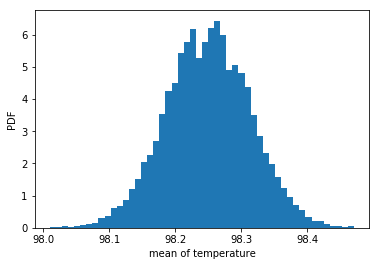

In [112]:
# Make a histogram of the results
_ = plt.hist(bs, bins=50, normed=True)
_ = plt.xlabel('mean of temperature')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [114]:
# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'temperature')

95% confidence interval = [ 98.12382692  98.37538462] temperature


the value 98.6 is not within the confidence inderval, this means that the null hypothesis can be regected.
The average population temperature is not 98.6

In [12]:
df.temperature.median()
df.temperature.std()
df.temperature.size

98.3

Fequentist statistical testing

A two sided test is appropriate to use since a set of temperatures will be tested against the population mean of 98.6, i.e. we can reject our hypothesis if teh sample mean if its statistically significantly higher or statistically significantly lower than 98.6.

The number of observatitions is >30 therefore a z test is appropriate 

In [ ]:
Z Test

In [120]:
#'Z-score is equal to : {zscore} p-value is equal to :  {pvalue}'.format(zscore=z[0], pvalue=z[1])
#'my name is {0}'.format("dim")

'Z-score is equal to : -5.4548232923645195 p-value is equal to :  4.9021570141012155e-08'

In [53]:
#z = ztest(df.temperature,value=98.6)
#print('Z-score is equal to : ', z[0], 'p-value is equal to : ',z[1])

Z-score is equal to :  -5.45482329236 p-value is equal to :  4.9021570141e-08


In [122]:
z_stat, p_val_z = ztest(df.temperature, value = 98.6)

print('z-statistic:',z_stat)
print('p value =',p_val_z)


z-statistic: -5.45482329236
p value = 4.9021570141e-08


The p-value is less than 0.05 and therefore we can reject the null hypothesis that the populations mean temperature is 98.6 F

T Test

In [45]:
t_stat, p_val_t = ttest_1samp(df.temperature, 98.6)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -5.45482329236
p value = 2.41063204156e-07


The p-value is less than 0.05 and therefore we can reject the null hypothesis that the populations mean temperature is 98.6 F

### 4.Draw a small sample of size 10 from the data and repeat both frequentist tests.
#### Which one is the correct one to use?
#### What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

### 5.At what temperature should we consider someone's temperature to be "abnormal"?
#### As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
#### Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

### 6.Is there a significant difference between males and females in normal temperature?
#### What testing approach did you use and why?
#### Write a story with your conclusion in the context of the original problem.

In [125]:
np.mean(df.temperature[df.gender == 'M'])

98.1046153846154

In [128]:
np.mean(df.temperature[df.gender == 'F'])

98.39384615384613

In [137]:
from scipy.stats import ttest_ind
print('Males sample size: ', len(df.temperature[df.gender == 'M']), '\nMale mean: ', np.mean(df.temperature[df.gender == 'M']))
print('Females sample size: ', len(df.temperature[df.gender == 'F']), '\nFemale mean:' , 
      np.mean(df.temperature[df.gender == 'F']))
t_test = ttest_ind(df.temperature[df.gender == 'M'],df.temperature[df.gender == 'F'])

print("As we have found a p-value of %  F < 0.025 (two-tailed hypothesis), we can reject the null hypothesis\n\
the Females and Males Temperature means are statisticaly significant different" % t_test[1])

Males sample size:  65 
Male mean:  98.1046153846154
Females sample size:  65 
Female mean: 98.39384615384613
As we have found a p-value of  0.023932 < 0.025 (two-tailed hypothesis), we can reject the null hypothesis
the Females and Males Temperature means are statisticaly significant different


Conclusion:

The sampled temperature is significantly lower than 98.6 F. 
If we only select female population the avg temperature is 98.6 F though. 
The sample mean is different for Females and Males, for Females it higher.  

In [140]:
t_stat, p_val_t = ttest_1samp(df.temperature[df.gender == 'F'], 98.6)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -2.23549807968
p value = 0.0288804507897


The p-value is greater than 0.05 and therefore we can not  reject the null hypothesis that the populations mean temperature is 98.6 F